<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/simple_linear_regression/03_python_course_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("Advertising.csv")
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [48]:
X = df.drop('sales',axis=1).values
y = df['sales'].values

In [49]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

test_predictions = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,test_predictions)

MSE = mean_squared_error(y_test,test_predictions)

RMSE = np.sqrt(MSE)

print(MAE)
print(RMSE)

0.5475837919149653
0.678458730792693


In [53]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [54]:
#choose optimal model polynomial

#steps
#create the different order polynomial
#split polynomial features into train and tes
#fit on train
#store rmse for BOTH train and tesst set
#plot the error vs polynomial degree

In [55]:
train_rmse_errors= []
test_rmse_errors= []

for d in range(1,10):

  poly_converter = PolynomialFeatures(degree= d,include_bias=False)
  poly_features = poly_converter.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train,y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)

In [56]:
train_rmse_errors

[np.float64(1.5526939990087725),
 np.float64(0.6057702019226604),
 np.float64(0.4756847293184344),
 np.float64(0.3742987908933714),
 np.float64(0.2410875823801666),
 np.float64(0.22044269363287083),
 np.float64(0.21968485935142004),
 np.float64(0.28088759773427757),
 np.float64(0.5634444961156573)]

In [57]:
test_rmse_errors

[np.float64(1.9307843822347202),
 np.float64(0.678458730792693),
 np.float64(0.5148267621824684),
 np.float64(1.275058965674257),
 np.float64(6.410701346538983),
 np.float64(20.22223007009243),
 np.float64(104.67395323018643),
 np.float64(4697.505686169983),
 np.float64(6348.786717317784)]

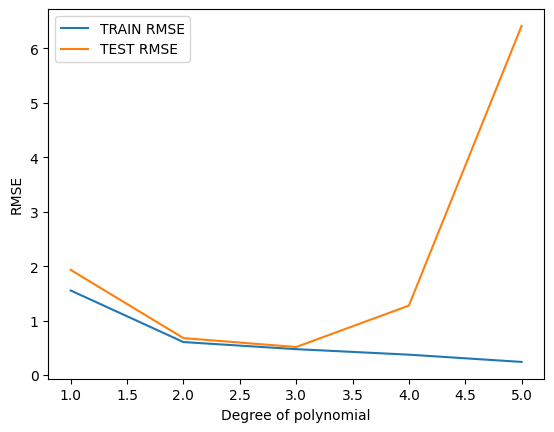

In [58]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.legend()

In [59]:
#using degree=3
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
full_converted_X = final_poly_converter.fit_transform(X)
final_model =LinearRegression()
final_model.fit(full_converted_X,y)


LinearRegression()

In [60]:
#save model and converter
from joblib import dump,load
dump(final_model,"final_poly_model.joblib")


['final_poly_model.joblib']

In [61]:
dump(final_poly_converter,"final_poly_converter.joblib")

['final_poly_converter.joblib']